In [28]:
import pymc as pm
from scipy.stats import bernoulli, beta, norm, uniform
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import scipy.stats as stats
import scipy
import os
import pandas as pd
import seaborn as sns
from scipy import special, stats
from google.colab import files
from google.colab import drive
from sklearn.preprocessing import StandardScaler, scale

In [2]:
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks")

Mounted at /content/drive


In [9]:
# import dataset
sleep = pd.read_csv('sleep.csv')

sleep

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Sleep_Quality,Physical_Activity_Level,Stress_Level,BMI_Category,Blood_Pressure,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Perform exploratory data analysis (EDA) to include as minimum a review of the summary statistics for the data.

### data type...
### category variables exploration...
### check missing values...
### check NA values...

In [14]:
# check data types
sleep.dtypes

Person_ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep_Duration             float64
Sleep_Quality                int64
Physical_Activity_Level      int64
Stress_Level                 int64
BMI_Category                object
Blood_Pressure              object
Heart_Rate                   int64
Daily_Steps                  int64
Sleep_Disorder              object
dtype: object

In [19]:
# convert object to category
for col in ['Gender', 'Occupation', 'BMI_Category', 'Blood_Pressure', 'Sleep_Disorder']:
    sleep[col] = sleep[col].astype('category')

In [20]:
sleep.dtypes

Person_ID                     int64
Gender                     category
Age                           int64
Occupation                 category
Sleep_Duration              float64
Sleep_Quality                 int64
Physical_Activity_Level       int64
Stress_Level                  int64
BMI_Category               category
Blood_Pressure             category
Heart_Rate                    int64
Daily_Steps                   int64
Sleep_Disorder             category
dtype: object

In [26]:
# Gender count
sleep.Gender.value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

In [10]:
# occupation count
sleep.Occupation.value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [11]:
# BMI category count
sleep.BMI_Category.value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI_Category, dtype: int64

In [12]:
# sleep disorder count
sleep.Sleep_Disorder.value_counts()

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep_Disorder, dtype: int64

In [17]:
# check missing values
pd.isnull(sleep).any()

Person_ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep_Duration             False
Sleep_Quality              False
Physical_Activity_Level    False
Stress_Level               False
BMI_Category               False
Blood_Pressure             False
Heart_Rate                 False
Daily_Steps                False
Sleep_Disorder             False
dtype: bool

In [22]:
# check NA values
sleep.isna().any()

Person_ID                  False
Gender                     False
Age                        False
Occupation                 False
Sleep_Duration             False
Sleep_Quality              False
Physical_Activity_Level    False
Stress_Level               False
BMI_Category               False
Blood_Pressure             False
Heart_Rate                 False
Daily_Steps                False
Sleep_Disorder             False
dtype: bool

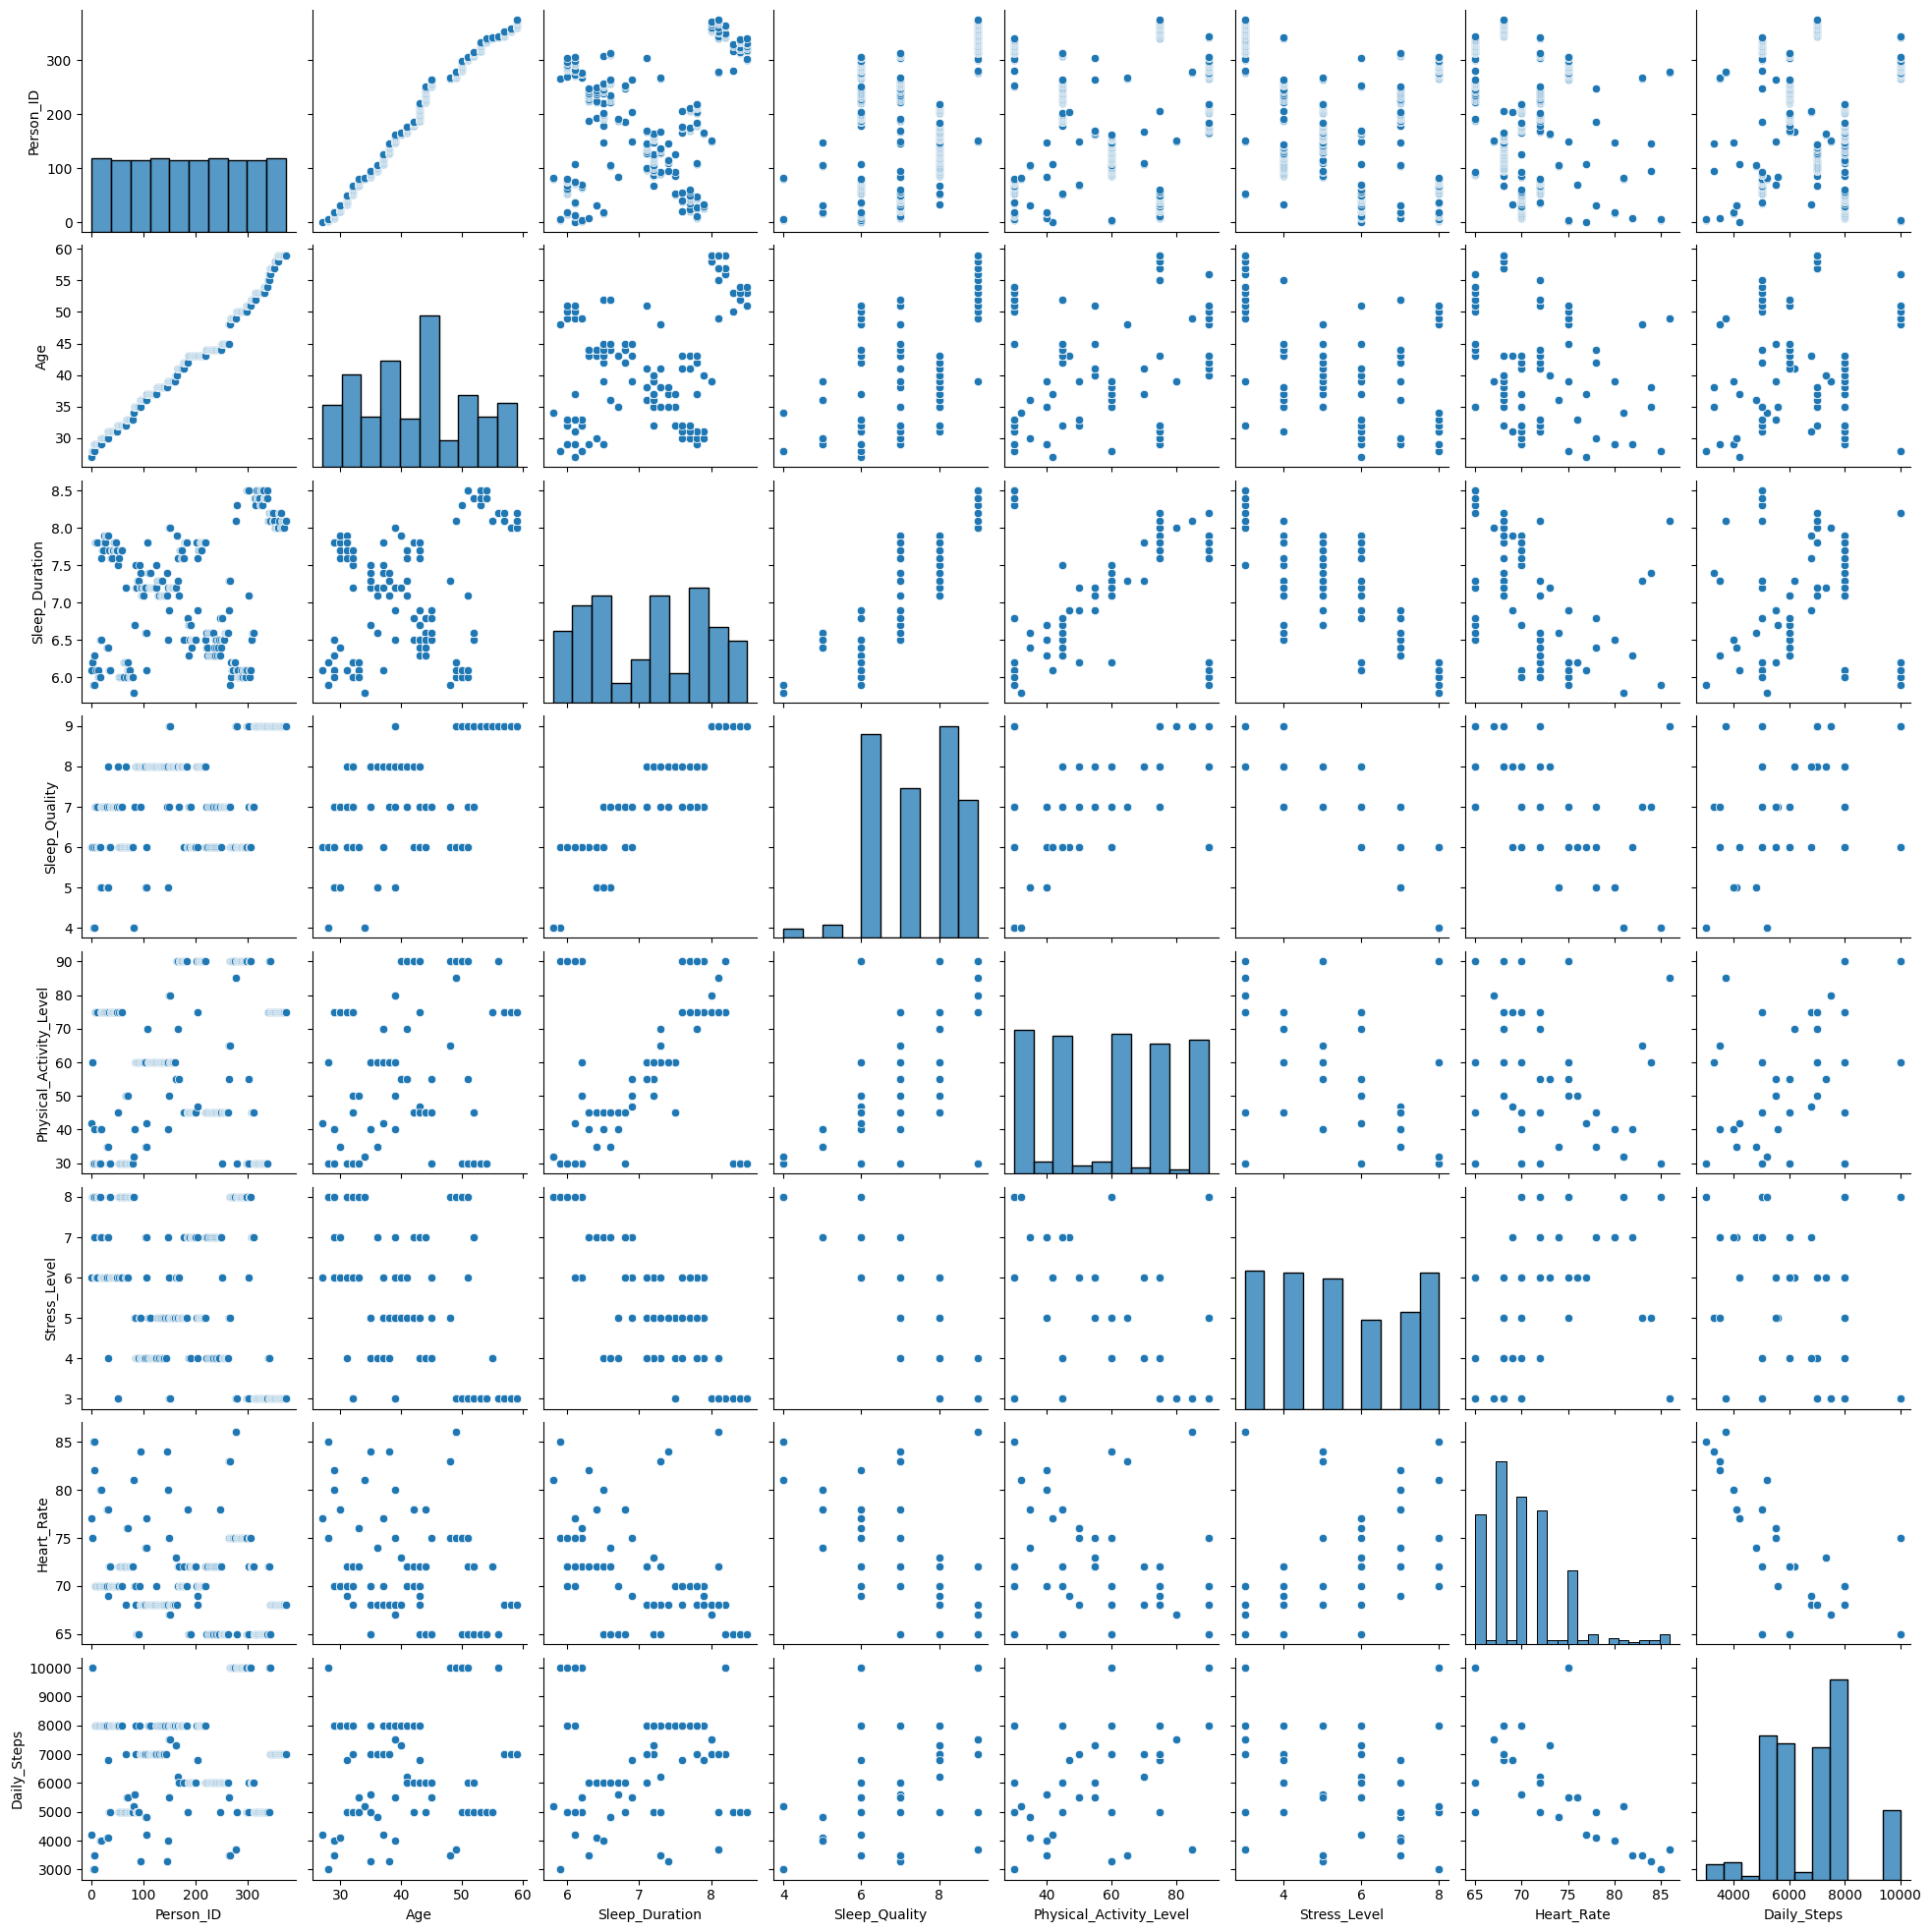

In [29]:
# pairplot/correlation
sns.pairplot(sleep)